In [8]:
import os
import h5py as h5
import sys
import falsecolor.coloring as fc
from falsecolor.process import ViewImage
import numba
from numba import jit
from numba import cuda
import numpy as np
import cv2

In [24]:
!pip list

Package                Version
---------------------- -----------
adjustText             0.7.3
anndata                0.8.0
anndata2pagoda         0.1
anndata2ri             1.0.6
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
args                   0.1.0
attrs                  21.4.0
backcall               0.2.0
backports.zoneinfo     0.2.1
beautifulsoup4         4.11.1
bleach                 5.0.0
brotlipy               0.7.0
cached-property        1.5.2
cellrank               1.2.0
certifi                2021.10.8
cffi                   1.15.0
charset-normalizer     2.0.4
click                  8.1.2
clint                  0.5.1
cmake                  3.24.1
colorama               0.4.4
conda                  4.12.0
conda-package-handling 1.8.1
coverage               6.3.2
cryptography           36.0.0
cycler                 0.11.0
Cython                 0.29.32
debugpy                1.6.0
decorator              5.1.1
defusedxml             0.7.1
dill                  

In [3]:
!pip install falsecolor

  Using cached falsecolor-1.1.4.9-py3-none-any.whl (28 kB)
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
     |████████████████████████████████| 13.5 MB 104 kB/s eta 0:00:01
     |████████████████████████████████| 76 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 60.9 MB 9.9 MB/s eta 0:00:011     |██████████                      | 19.2 MB 5.2 MB/s eta 0:00:08
     |████████████████████████████████| 178 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 95 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 115 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 8.3 MB/s eta 0:00:01


In [33]:
!pip install --force-reinstall --no-deps llvmlite==0.36.0

  Using cached llvmlite-0.36.0-cp36-cp36m-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
ERROR: Cannot uninstall llvmlite 0.36.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps llvmlite==0.36.0'.


In [36]:
!pip install llvmlite==0.31.0 --ignore-installed

  Using cached llvmlite-0.31.0-cp36-cp36m-manylinux1_x86_64.whl (20.2 MB)


In [9]:
sys.executable

'/home/mcrewcow/anaconda3/bin/python'

In [10]:
os.getcwd()
file_path = os.path.join(os.getcwd(),'./h5_sample_data/bone/LECD31D5THF/stackED.h5')
file_path

'/home/mcrewcow/./h5_sample_data/bone/LECD31D5THF/stackED.h5'

In [11]:
file_path = os.path.join(os.getcwd(),'./h5_sample_data/bone/LECD31D5THF/stackED.h5')
file_path


with h5.File('/mnt/c/Users/Emil/falsecolor/NEW.h5', 'r') as f:
    nuclei = f['channel1'][:]
    cyto = f['channel0'][:]
    np.reshape(nuclei, (2560,2160,3))
    np.reshape(cyto, (2560, 2160,3))
f.close()
print(nuclei.shape)

ValueError: cannot reshape array of size 111526280 into shape (2560,2160,3)

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:title={'center':'Eosin'}>)

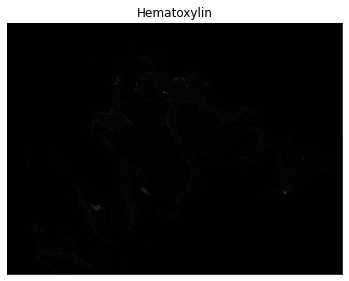

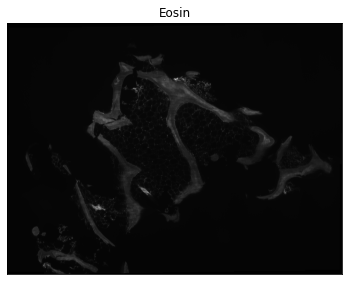

In [13]:
ViewImage(nuclei[1], figsize = (6,6), cmap = 'gray', title = 'Hematoxylin')
ViewImage(cyto[1], figsize = (6,6), cmap = 'gray', title = 'Eosin')

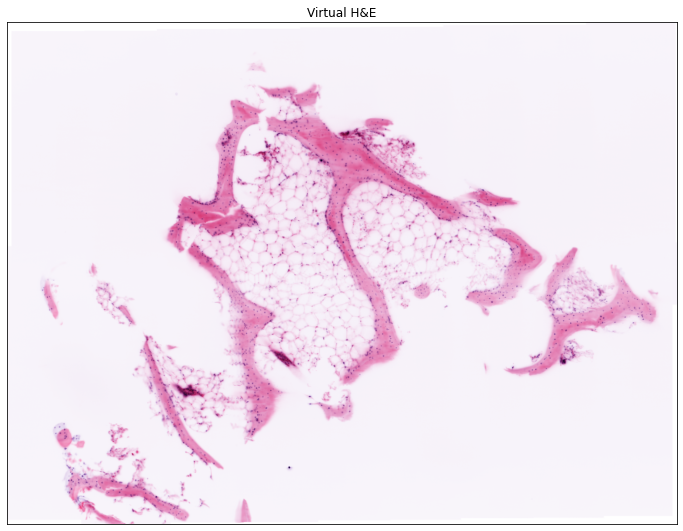

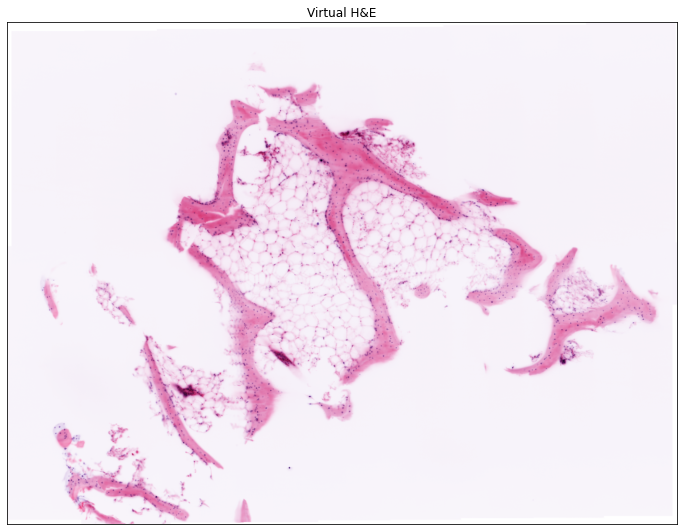

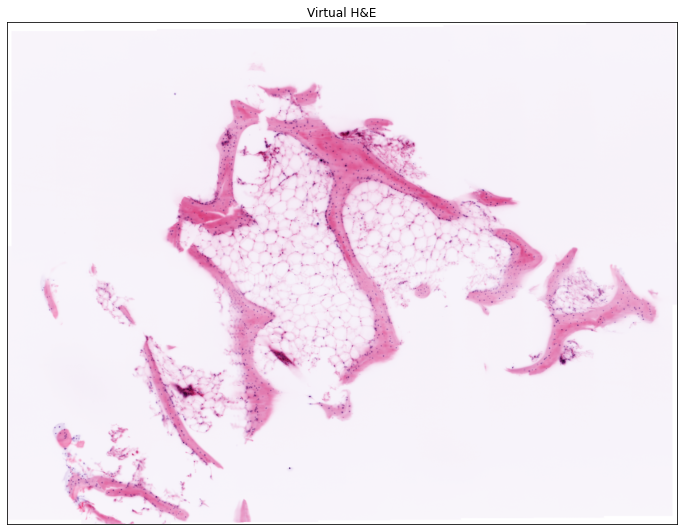

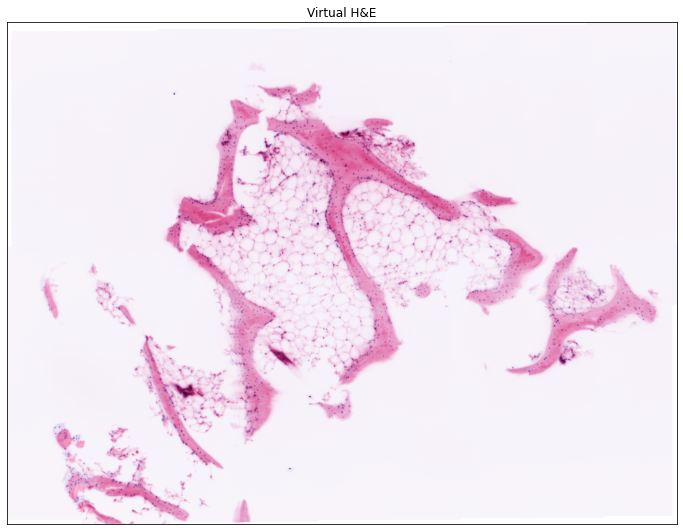

In [14]:
for i in range(0,4):
  nuc_background = fc.getBackgroundLevels(nuclei[i])[1]
  cyto_background = fc.getBackgroundLevels(cyto[i])[1]
  pseudo_image = fc.falseColor(nuclei[i], cyto[i], nuc_threshold=nuc_background, cyto_threshold=cyto_background)
  ViewImage(pseudo_image, figsize = (12,12), title = 'Virtual H&E')
  file_folder = os.path.join('/mnt/c/Users/Emil/falsecolor/NEW.h5')
  file_name = os.path.join('/mnt/c/Users/Emil/falsecolor/NEW.h5' + str(i).zfill(4) + '.tiff')


In [1]:
import sys
sys.path

['/home/mcrewcow',
 '/home/mcrewcow/anaconda3/lib/python37.zip',
 '/home/mcrewcow/anaconda3/lib/python3.7',
 '/home/mcrewcow/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/mcrewcow/anaconda3/lib/python3.7/site-packages',
 '/home/mcrewcow/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/mcrewcow/.ipython']

In [16]:
!{sys.executable} -m pip install conda

In [17]:
import conda

In [18]:
!type -a conda

The system cannot find the file specified.
Error occurred while processing: -a.
The system cannot find the file specified.
Error occurred while processing: conda.


In [1]:
python

NameError: name 'python' is not defined